In [1]:
import numpy as np
import pygraphviz as pgv
import pydotplus as pdp
from IPython.display import Image
from functions.plotting import digraph_dot_from_transition_matrix

to_save=True

# Set Params

In [2]:
choices = ['Space Mountain', 'Indiana Jones Adventure', 'Haunted Mansion']
transition_matrix = np.array([[0.8, 0.15, 0.05],
                              [0.3, 0.65, 0.05],
                              [0.15, 0.05, 0.8]],)

# Plot

In [3]:
dot = digraph_dot_from_transition_matrix(transition_matrix, choices,
                                     ['firebrick3', 'dodgerblue3', 'forestgreen'])
print(dot)

digraph {
    rankdir=LR;
    SM[shape=circle,style=filled,color=firebrick3]
    IJA[shape=circle,style=filled,color=dodgerblue3]
    HM[shape=circle,style=filled,color=forestgreen]
    SM -> SM[label="0.8"];
    SM -> IJA[label="0.15"];
    SM -> HM[label="0.05"];
    IJA -> SM[label="0.3"];
    IJA -> IJA[label="0.65"];
    IJA -> HM[label="0.05"];
    HM -> SM[label="0.15"];
    HM -> IJA[label="0.05"];
    HM -> HM[label="0.8"];
}}


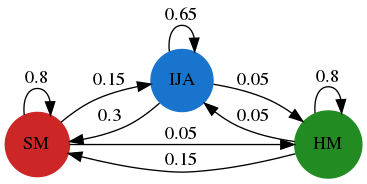

In [4]:
# careful: cannot open this twice in a row
# see: https://github.com/pygraphviz/pygraphviz/issues/171
graph = pgv.AGraph(dot)
Image(graph.draw(format='png', prog='dot'))  # show

In [5]:
dir_name = 'figures/transition-diagram'
filename = 'markov-chain.png'

if to_save:
    pydot_graph = pdp.graph_from_dot_data(dot)
    pydot_graph.set_size("6,6!")
    pydot_graph.write_png(f"{dir_name}/{filename}")